In [1]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
data = load_breast_cancer()

# Create a DataFrame from the data
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first 5 rows
df.head()




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show outputs
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_test:", X_test_scaled.shape)
print("First 2 rows of standardized X_train:\n", X_train_scaled[:2])

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
First 2 rows of standardized X_train:
 [[-1.44075296 -0.43531947 -1.36208497 -1.1391179   0.78057331  0.71892128
   2.82313451 -0.11914956  1.09266219  2.45817261 -0.26380039 -0.01605246
  -0.47041357 -0.47476088  0.83836493  3.25102691  8.43893667  3.39198733
   2.62116574  2.06120787 -1.23286131 -0.47630949 -1.24792009 -0.97396758
   0.72289445  1.18673232  4.67282796  0.9320124   2.09724217  1.88645014]
 [ 1.97409619  1.73302577  2.09167167  1.85197292  1.319843    3.42627493
   2.01311199  2.66503199  2.1270036   1.55839569  0.80531919 -0.81268678
   0.75195659  0.87716951 -0.89605315  1.18122247  0.18362761  0.60059598
  -0.31771686  0.52963649  2.17331385  1.3112795   2.08161691  2.1374055
   0.76192793  3.26560084  1.92862053  2.6989469   1.89116053  2.49783848]]


In [6]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
model = LogisticRegression()

# Fit the model to training data
model.fit(X_train, y_train)

# Predict on test data (optional, useful for next steps)
y_pred = model.predict(X_test)

# View model coefficients (optional)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [0.36142425]
Coefficients: [[ 1.8416563   0.11604855 -0.1547918   0.00543273 -0.0743871  -0.34630885
  -0.47931489 -0.20711105 -0.11122079 -0.02251289  0.0590639   0.93265271
   0.0940304  -0.0914276  -0.00706797 -0.06780586 -0.09509508 -0.02644827
  -0.02628767 -0.00589681  1.91021386 -0.35314278 -0.10729537 -0.03094047
  -0.13131502 -1.03444074 -1.27978192 -0.37990809 -0.35917677 -0.09721841]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


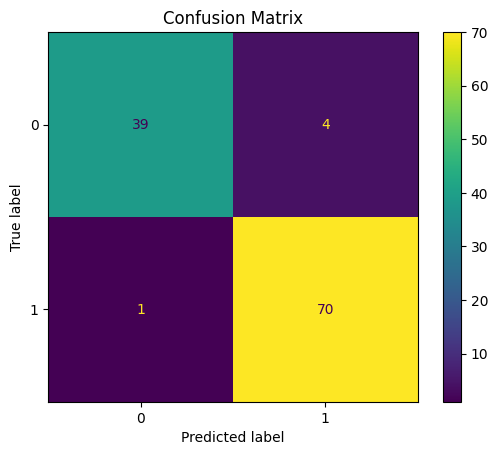

Precision: 0.9459459459459459
Recall: 0.9859154929577465
ROC-AUC Score: 0.9983622666229939


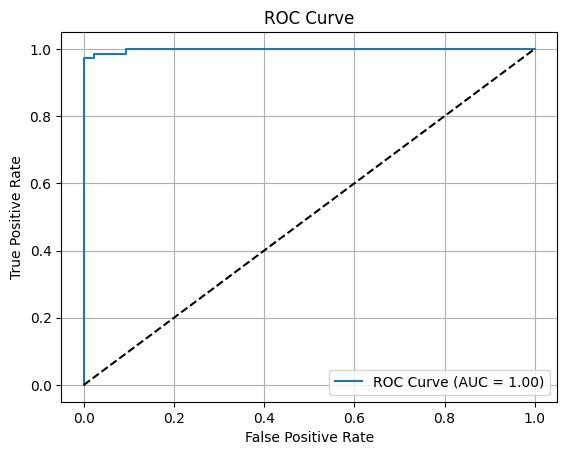

In [7]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict probabilities and class labels
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_class = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Precision and Recall
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()



Threshold: 0.3
Confusion Matrix:
[[41  2]
 [ 0 71]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Threshold: 0.5
Confusion Matrix:
[[41  2]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Threshold: 0.7
Confusion Matrix:
[[42  1]
 [ 4 67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
         

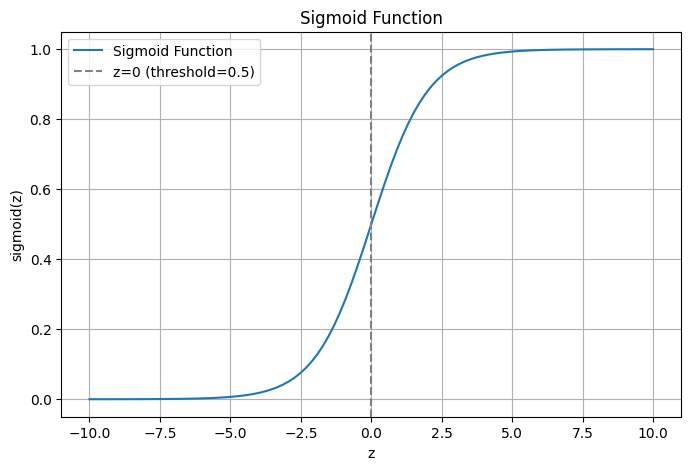

In [8]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split and standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train_std, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test_std)[:, 1]

# Tune threshold
thresholds = [0.3, 0.5, 0.7]
for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    print(f"\nThreshold: {t}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Plot sigmoid function
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))
plt.figure(figsize=(8, 5))
plt.plot(z, sigmoid, label='Sigmoid Function')
plt.axvline(x=0, color='gray', linestyle='--', label='z=0 (threshold=0.5)')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.legend()
plt.show()